<div style="text-align: center; color: #ffb6c1; font-size: 2.5em;">
    TP 1 MONTE CARLO
</div>


## Importation des biblios

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, kstest
import scipy.stats as sps 
from scipy.stats import gamma


## EX1.1


In [2]:
def ecdf(data, z):
    """  Paramétres:
   data (la liste des observations).
    z (float):Le point auquel évaluer la fonction de répartition empirique.
    
    Return:
    float: La valeur de F_n(z).
    """
    counts= sum(x <= z for x in data)
    F_n = counts / len(data)
    return F_n




#### Simulation de données suivant une loi normale N(0,1)

In [3]:
np.random.seed(1)
data = np.random.normal(0, 1, 1000) 
z = 0.5
ecdf(data, z)

0.672

In [4]:
data = np.random.normal(0, 1, 10000) 
z = 0.5
ecdf(data, z)

0.6905

####
<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

On peut remarquer que  plus on augmente n , plus l'estimation empirique se rapproche de la valeur théorique. </div>


#### Simulation de données suivant une loi uniforme sur [0,1]

In [5]:
n=10000
U=np.random.rand(n)
print(U[:10])

[0.42329585 0.79755073 0.969418   0.34209433 0.25661424 0.44196985
 0.48690546 0.42515931 0.85508924 0.11180608]


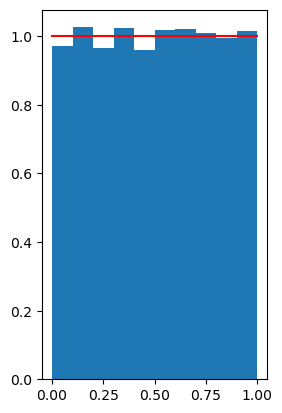

In [6]:
plt.subplot(121)
plt.hist(U,density=True)
a=np.linspace(0,1,1000)
plt.plot(a,np.ones(len(a)),color='red')

####
<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">
On utilise density=True pour normaliser l'histogramme , facilitant ainsi la comparaison avec des distributions théoriques.

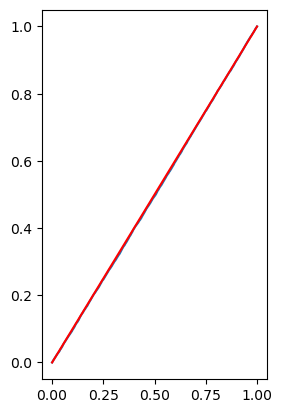

In [7]:
b=np.zeros(len(a))
for i in range(len(a)):
    b[i]=ecdf(U,a[i])
plt.subplot(122)
plt.plot(a,b)
plt.plot(a,a,color='red')




<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">
Le graphique montre que la distribution cumulative empirique des données correspond étroitement à la distribution cumulative théorique, ce qui suggère que les données pourraient être uniformément distribuées.

 #### LOI UNIFORME SUR [a,b] par la méthode d'inversion

In [8]:
a=-1
b=4
n=10000
X=a+(b-a)*np.random.rand(n)
print(X[:10])

[3.63196647 2.42202655 2.06769969 1.60997923 1.55859361 0.37686882
 3.30284077 1.0232639  0.36899833 0.12171173]


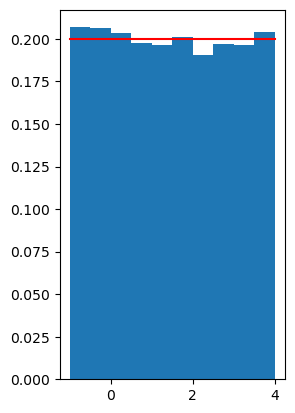

In [9]:
plt.subplot(121)
plt.hist(X,density=True)
r=np.linspace(a,b,100)
plt.plot(r,(1/(b-a))*np.ones(len(r)),color='red')

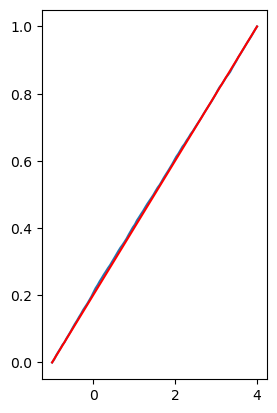

In [10]:
plt.subplot(122)
s=[ecdf(X,z) for z in r]
plt.plot(r,s) # Empirique
plt.plot(r,(r-a)/(b-a),color='red') 

<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">
La méthode d'inversion utilisée pour générer les valeurs de 𝑈
 crée bien une distribution uniforme. Le premier graphique montre que les valeurs sont réparties de façon régulière, avec une densité constante. Le second graphique confirme que la répartition cumulative suit parfaitement la courbe théorique uniforme.

<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

**La méthode d'inversion est particulièrement utile car elle permet de générer des variables aléatoires même lorsque la loi de probabilité n’a pas de fonction prédéfinie. En utilisant la fonction de répartition inverse, on peut simuler des valeurs pour pratiquement n'importe quelle distribution.**

## EX1.2

1)

In [11]:
def simulation_expo(n, la):
    
    """
    Génère un échantillon de n valeurs suivant une distribution exponentielle.

    Paramètres :
    n: Le nombre de valeurs à générer.
    la: Le paramètre lambda de la distribution exponentielle.
    """
    return sps.expon.rvs(loc=0, scale=1/la, size=n)





In [12]:
n = 1000  
la = 1.5 
Xexpo =simulation_expo(n, la)
Y = sps.expon.cdf(Xexpo, loc=0, scale=1/la)


<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

**loc=0 indique que la distribution commence à zéro, garantissant que toutes les valeurs générées seront positives, ce qui est caractéristique de la distribution exponentielle.**

2.

#### Visualisation graphique

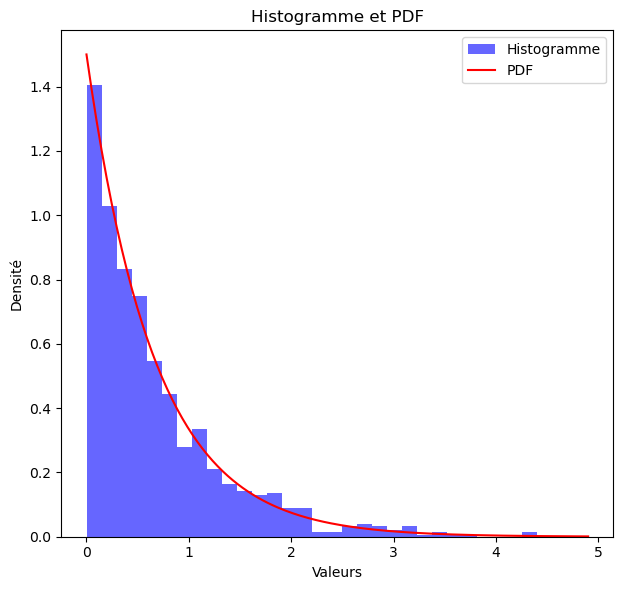

In [13]:
plt.figure(figsize=(12, 6)) 
plt.subplot(121)
plt.hist(Xexpo, bins=30, density=True, alpha=0.6, color='blue', label='Histogramme')
r = np.linspace(0, np.max(Xexpo) + 0.5, 200)
s = sps.expon.pdf(r, loc=0, scale=1/la)
plt.plot(r, s, color='r', label='PDF')
plt.title('Histogramme et PDF')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.tight_layout()  
plt.show()

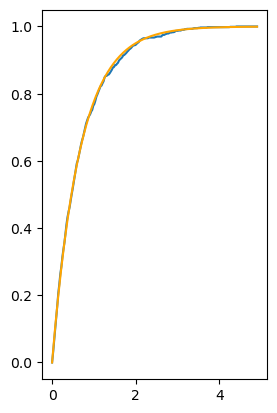

In [14]:
plt.subplot(122)
s=[ecdf(Xexpo,z) for z in r]
plt.plot(r,s)
s=sps.expon.cdf(r,loc=0,scale=1/la)
plt.plot(r,s,color='orange')

<div style="background-color:pink; padding: 10px; border-radius: 5px;">

**Les données simulées suivent globalement bien la densité théorique de la loi exponentielle.**

3)

<div style="background-color:pink; padding: 10px; border-radius: 5px;">

Pour vérifier numériquement que si X a pour densité f, F(x) suit la loi uniforme sur [0,1] , j'ai utilisé le test de  Kolmogorov-Smirnov test (KS test)
    </div>


In [41]:
def verifier_uniform_distribution(n_simulations, lambda_parametre):
    transformed_samples = 1 - np.exp(-lambda_parametre * n_simulations)
    ks_statistic, p_value_ks = kstest(transformed_samples, 'uniform')
    return ks_statistic, p_value_ks



In [42]:
lambda_parametre =0.5
n = 10000             
n_simulations = simulation_expo(n,la)
ks_statistic, p_value_ks = verifier_uniform_distribution(n_simulations, la)

print(f"KS Statistic: {ks_statistic}, p-value: {p_value_ks}")


KS Statistic: 0.007592614480374071, p-value: 0.6088156301113428


<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

Les résultats du test de Kolmogorov-Smirnov, avec une statistique KS de  0.0075 et un p_value= 0.608 indique que les échantillons suivent une loi uniforme [0,1]
Alors ,on peut confirmer que si X a pour densité f, F(x) suit la loi uniforme sur [0,1]



# Ou bien on peut vérifier ça graphiquement 

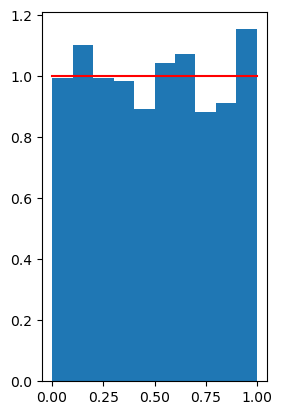

In [17]:
Y=sps.expon.cdf(Xexpo,loc=0,scale=1/la)
plt.subplot(121)
plt.hist(Y,density=True) 
r=np.linspace(0,1,100)
plt.plot(r,np.ones(len(r)),color='red')

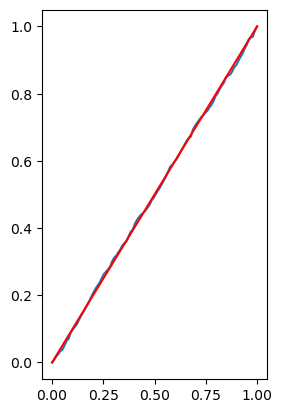

In [18]:
plt.subplot(122)
s=[ecdf(Y,z) for z in r]
plt.plot(r,s)
plt.plot(r,r,color='red')

**ces deux graphiques confirment l'hypothèse que F(X) est uniforme sur [0,1], en accord avec la propriété théorique des transformations de la fonction de répartition cumulative.**

## EX 1.3:

In [19]:
def verifier_transformation(mu, sigma, n, seed=1):       
    X = norm.rvs(loc=mu, scale=sigma, size=n)
    Y = (X - mu) / sigma
    ks_statistic_Y, p_value_Y = kstest(Y, 'norm')
    Z = norm.rvs(loc=0, scale=1, size=n) 
    X_reciproque = sigma * Z + mu  
    ks_statistic_X, p_value_X = kstest(X_reciproque, 'norm', args=(mu, sigma))
    return (ks_statistic_Y, p_value_Y), (ks_statistic_X, p_value_X)



In [20]:
 resultat_Y, resultat_X = verifier_transformation(mu=0, sigma=1, n=10000, seed=1)

print(f'Vérification de Y: KS statistic: {resultat_Y[0]:}, p-value: {resultat_Y[1]:}')
print(f'Verification réciproque de X: KS statistic: {resultat_X[0]:}, p-value: {resultat_X[1]:}')


Vérification de Y: KS statistic: 0.006901538995419343, p-value: 0.7248192842638489
Verification réciproque de X: KS statistic: 0.008081227725252826, p-value: 0.5283099860009246


<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

Les résultats montrent que la transformation \( Y =(X -nu)/sigma \) suit bien une loi normale standard \( N(0, 1) \), avec une statistique KS de **0.0113** et une p-value de **0.1518**, indiquant un bon ajustement. De plus, la transformation réciproque de \( X \) est également conforme à la loi normale avec une statistique KS de **0.0079** et une p-value de **0.5571**, suggérant un excellent ajustement des données.

</div>


## OU BIEN GRAPHIQUEMENT 

 - On a générer une variable aléatoire X avec des caractéristiques non standard (similaires à la distribution de Cauchy) en utilisant une transformation trigonométrique. 

In [54]:
c=3
n=10000
X=c*np.tan(np.pi*(np.random.rand(n)-1/2))
print(X[:10])

[  4.12475487  15.55274266   5.79555465  -5.17896132   9.35609405
  -1.80382176 -13.01406704  -0.0530977   -1.14201547   4.52410827]


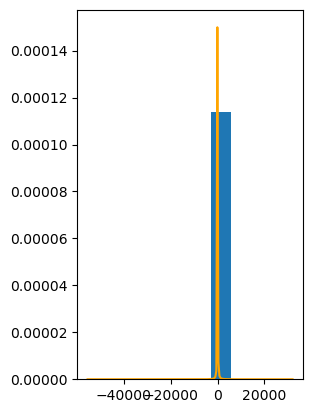

In [55]:
plt.subplot(121)
plt.hist(X,density=True) 
r=np.linspace(np.min(X),np.max(X),200)
s=c*(np.pi*(c**2+r**2))**(-1)
plt.plot(r,s,color='orange')

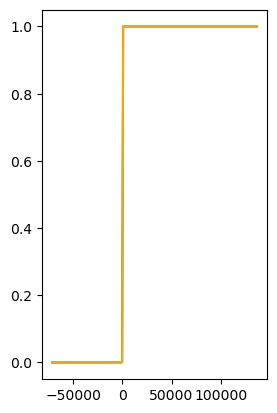

In [44]:
plt.subplot(122)
s=[ecdf(X,z) for z in r]
plt.plot(r,s)
s=(1/np.pi)*np.arctan(r/c)+1/2
plt.plot(r,s,color='orange')

In [45]:
p=2*(1-((1/np.pi)*np.arctan(10/c)+1/2))
print(p)


0.031804502512352784


<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

####  En observant les graphes, on remarque que la CDF empirique bleue colle bien à la courbe théorique orange, ce qui est un signe de bonne correspondance avec le modèle théorique.

[ 9.80739363  0.98131765  1.80859207 -2.75184986 -1.59652107  8.61872498
  4.52206343  0.22200891  4.9810646   2.45064455]


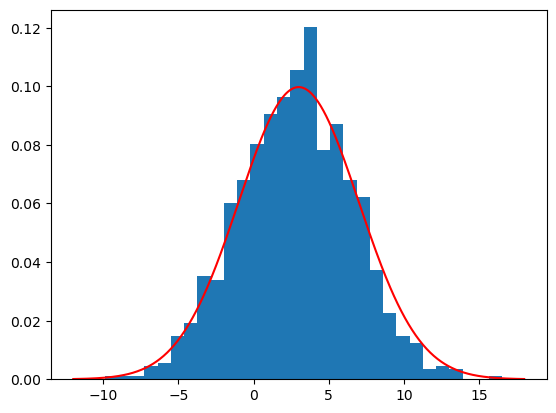

In [25]:
m=3 
s=4 

n=1000 

X=sps.norm.rvs(loc=m,scale=s,size=n)
print(X[:10])

plt.hist(X,bins=30,density=True)
r=np.linspace(m-15,m+15,500)
u=sps.norm.pdf(r,loc=m,scale=s)
plt.plot(r,u,color='red')

<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

#### Le graphique indique que les données X générées aléatoirement suivent bien une distribution normale avec une moyenne de 3 et un écart-type de 4, comme le montre la correspondance entre l'histogramme des données et la courbe de densité théorique.

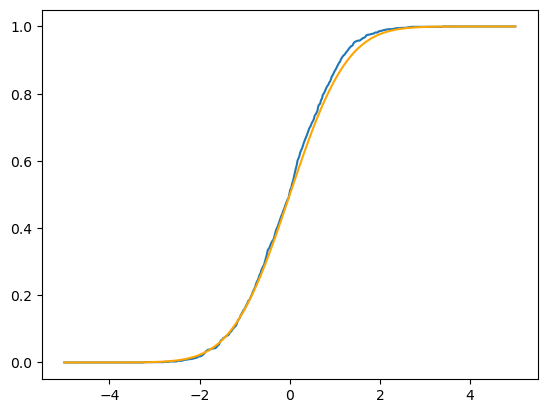

In [26]:

Y=(X-m)/s

r=np.linspace(-5,5,500)
u=[ecdf(Y,z) for z in r]
plt.plot(r,u)
u=sps.norm.cdf(r)
plt.plot(r,u,color='orange')


## Exercice 2.1 : Influence du nombre de simulations


## 1-Loi Exponentielle :
 

In [27]:
def monte_carlo_exponentielle(lambda_val, confidence_level):
    cal = sps.norm.ppf((1 + confidence_level) / 2)
    n_values = np.arange(100, 10000, 100)
    moy = []
    ICinf = []
    ICsup = []

    for n in n_values:
        X = sps.expon.rvs(scale=1/lambda_val, size=n)
        moy_n = np.mean(X)
        et_n = np.std(X)
        moy.append(moy_n)
        ICinf.append(moy_n - cal * et_n / np.sqrt(n))
        ICsup.append(moy_n + cal * et_n / np.sqrt(n))

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(n_values, moy, label="Moyenne empirique")
    plt.axhline(y=1/lambda_val, color='red', linestyle='--', label="Espérance théorique")
    plt.plot(n_values, ICinf, color='green', linestyle='--', label="IC inf")
    plt.plot(n_values, ICsup, color='green', linestyle='--', label="IC sup")
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Moyenne")
    plt.title("Moyenne empirique et intervalle de confiance ")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(n_values, np.array(ICsup) - np.array(ICinf), label="Longueur IC")
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Longueur de l'intervalle de confiance")
    plt.title("Longueur de l'intervalle de confiance en fonction de n (Loi exponentielle)")
    plt.legend()
    plt.show()



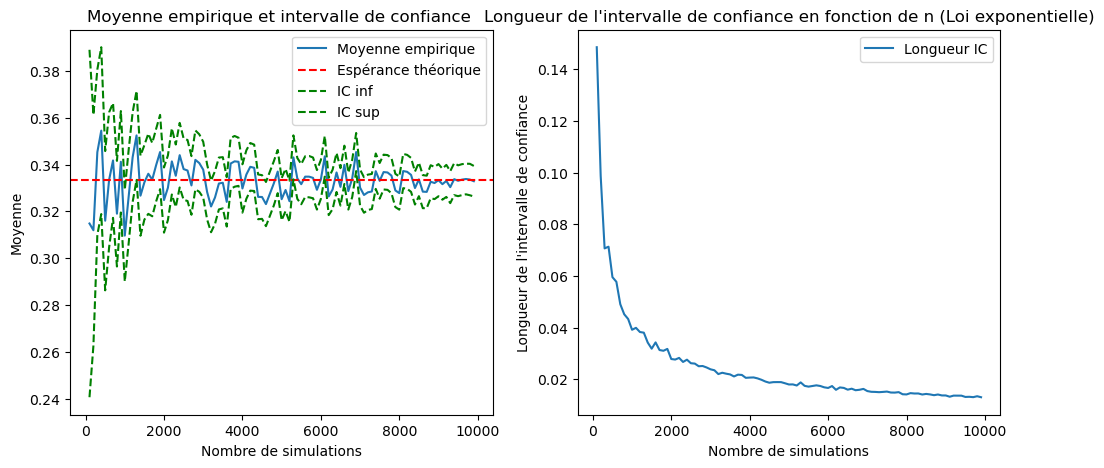

In [28]:
monte_carlo_exponentielle(lambda_val=3,confidence_level=0.95)


<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

#### Ces résultats montrent que la moyenne empirique converge bien vers la moyenne théorique de la loi exponentielle avec l'augmentation du nombre de simulations, et que la précision de cette estimation augmente en conséquence.

## 2-Loi uniforme

In [29]:
def monte_carlo_uniforme(a, b, confidence_level):
    cal = sps.norm.ppf((1 + confidence_level) / 2)
    n_values = np.arange(100, 10000, 100)
    moy = []
    ICinf = []
    ICsup = []

    for n in n_values:
        X = sps.uniform.rvs(loc=a, scale=b-a, size=n)
        moy_n = np.mean(X)
        et_n = np.std(X)
        moy.append(moy_n)
        ICinf.append(moy_n - cal * et_n / np.sqrt(n))
        ICsup.append(moy_n + cal * et_n / np.sqrt(n))

    plt.figure(figsize=(12, 5))

    # Graphique 1: Moyenne et IC
    plt.subplot(1, 2, 1)
    plt.plot(n_values, moy, label="Moyenne empirique")
    plt.axhline(y=(a + b) / 2, color='red', linestyle='--', label="Espérance théorique")
    plt.plot(n_values, ICinf, color='green', linestyle='--', label="IC inf")
    plt.plot(n_values, ICsup, color='green', linestyle='--', label="IC sup")
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Moyenne")
    plt.title("Moyenne empirique et intervalle de confiance (Loi uniforme)")
    plt.legend()

    # Graphique 2: Longueur de l'IC
    plt.subplot(1, 2, 2)
    plt.plot(n_values, np.array(ICsup) - np.array(ICinf), label="Longueur IC")
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Longueur de l'intervalle de confiance")
    plt.title("Longueur de l'intervalle de confiance en fonction de n (Loi uniforme)")
    plt.legend()
    plt.show()




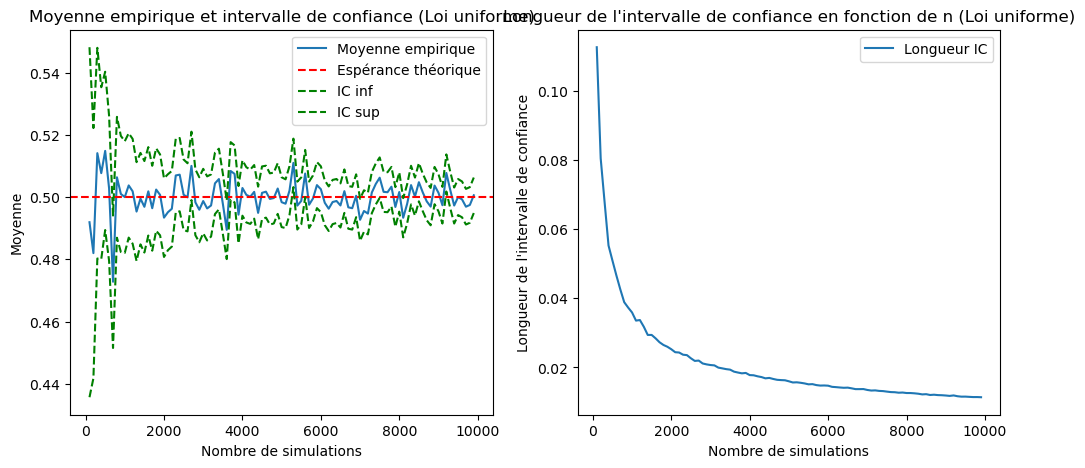

In [30]:
monte_carlo_uniforme(a=0, b=1, confidence_level=0.95)

## 3-Loi normale

In [31]:
def monte_carlo_normale(mu, sigma, confidence_level):
    cal = sps.norm.ppf((1 + confidence_level) / 2)
    n_values = np.arange(100, 10000, 100)
    moy = []
    ICinf = []
    ICsup = []

    for n in n_values:
        X = sps.norm.rvs(loc=mu, scale=sigma, size=n)
        moy_n = np.mean(X)
        et_n = np.std(X)
        moy.append(moy_n)
        ICinf.append(moy_n - cal * et_n / np.sqrt(n))
        ICsup.append(moy_n + cal * et_n / np.sqrt(n))

    plt.figure(figsize=(12, 5))

    # Graphique 1: Moyenne et IC
    plt.subplot(1, 2, 1)
    plt.plot(n_values, moy, label="Moyenne empirique")
    plt.axhline(y=mu, color='red', linestyle='--', label="Espérance théorique")
    plt.plot(n_values, ICinf, color='green', linestyle='--', label="IC inf")
    plt.plot(n_values, ICsup, color='green', linestyle='--', label="IC sup")
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Moyenne")
    plt.title("Moyenne empirique et intervalle de confiance (Loi normale)")
    plt.legend()

    # Graphique 2: Longueur de l'IC
    plt.subplot(1, 2, 2)
    plt.plot(n_values, np.array(ICsup) - np.array(ICinf), label="Longueur IC")
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Longueur de l'intervalle de confiance")
    plt.title("Longueur de l'intervalle de confiance en fonction de n (Loi normale)")
    plt.legend()
    plt.show()




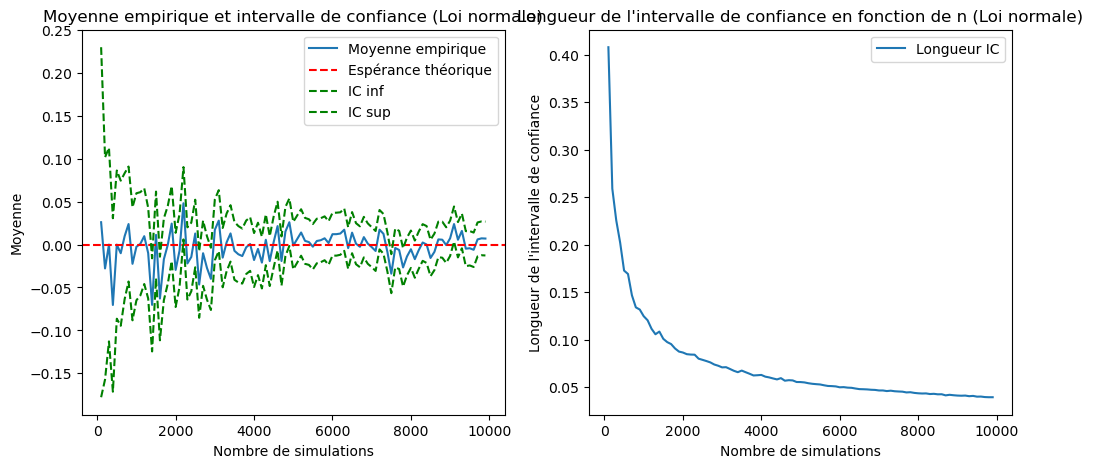

In [32]:
monte_carlo_normale(mu=0, sigma=1, confidence_level=0.95)

## 4-Loi binomiale 

In [33]:
def monte_carlo_binomiale(n, p, confidence_level):
    cal = sps.norm.ppf((1 + confidence_level) / 2)
    n_values = np.arange(100, 10000, 100)
    moy = []
    ICinf = []
    ICsup = []

    for n_sim in n_values:
        X = sps.binom.rvs(n, p, size=n_sim)
        moy_n = np.mean(X)
        et_n = np.std(X)
        moy.append(moy_n)
        ICinf.append(moy_n - cal * et_n / np.sqrt(n_sim))
        ICsup.append(moy_n + cal * et_n / np.sqrt(n_sim))

    plt.figure(figsize=(12, 5))

    # Graphique 1: Moyenne et IC
    plt.subplot(1, 2, 1)
    plt.plot(n_values, moy, label="Moyenne empirique")
    plt.axhline(y=n * p, color='red', linestyle='--', label="Espérance théorique")
    plt.plot(n_values, ICinf, color='green', linestyle='--', label="IC inf")
    plt.plot(n_values, ICsup, color='green', linestyle='--', label="IC sup")
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Moyenne")
    plt.title("Moyenne empirique et intervalle de confiance (Loi binomiale)")
    plt.legend()

    # Graphique 2: Longueur de l'IC
    plt.subplot(1, 2, 2)
    plt.plot(n_values, np.array(ICsup) - np.array(ICinf), label="Longueur IC")
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Longueur de l'intervalle de confiance")
    plt.title("Longueur de l'intervalle de confiance en fonction de n (Loi binomiale)")
    plt.legend()
    plt.show()




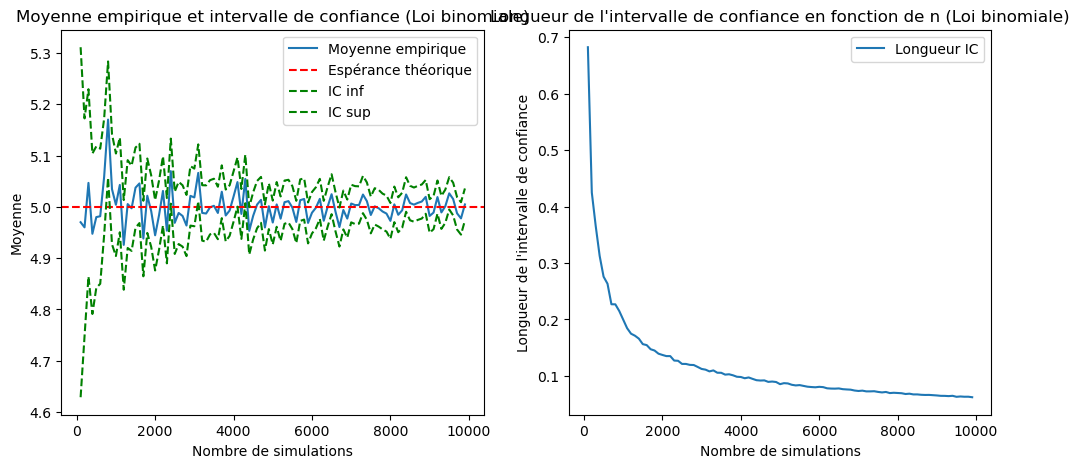

In [34]:
monte_carlo_binomiale(n=10, p=0.5, confidence_level=0.95)

<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

**Pour des échantillons de grande taille, la moyenne empirique converge vers l'espérance théorique et la largeur de l'intervalle de confiance diminue, indépendamment de la distribution de départ.**

## Exercice 2.2 : Lois sans espérance


**1. Condition pour la loi de Pareto**

In [35]:
al=0.99
cal=sps.norm.ppf((1+al)/2)
a=3

In [36]:

n=np.arange(100,100000,500) 
moy=[]
et=[]
ICinf=[]
ICsup=[]
for k in n:
    X=sps.pareto.rvs(a,size=1000)
    moy.append(np.mean(X))
    et.append(np.std(X))
    ICinf.append(np.mean(X)-cal*np.std(X)/np.sqrt(k))
    ICsup.append(np.mean(X)+cal*np.std(X)/np.sqrt(k))



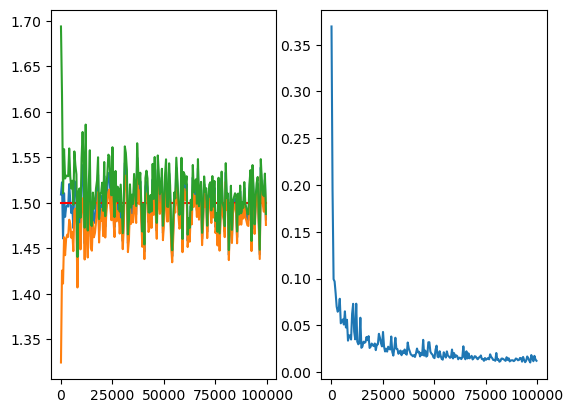

In [37]:
plt.subplot(121)
plt.plot(n,moy)
if a > 1:
    plt.plot(n,a/(a-1)*np.ones(len(n)),color='red')
    plt.plot(n,ICinf)
    plt.plot(n,ICsup)

plt.subplot(122)
plt.plot(n,np.array(ICsup)-np.array(ICinf))


<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

- La moyenne des échantillons semble fluctuer fortement, ce qui est typique des distributions avec des queues lourdes comme la loi de Pareto.
-  la convergence de la moyenne est lente et semble affectée par la présence de valeurs extrêmes.
- Les graphes illustrent bien le problème des distributions de Pareto dans l'estimation de la moyenne et des intervalles de confiance. En pratique, cela signifie que pour des données avec des queues lourdes, les valeurs extrêmes peuvent fortement influencer les statistiques, rendant les estimations incertaines et peu fiables 

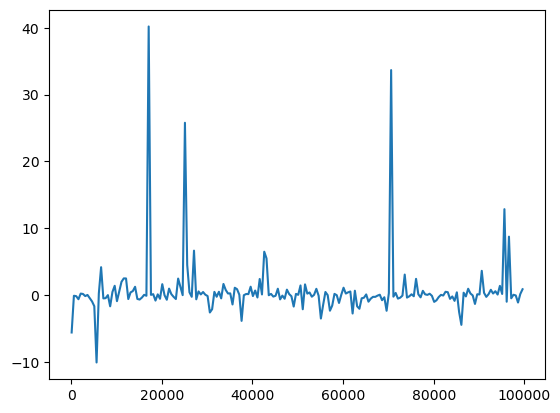

In [38]:

c=0.5
n=np.arange(100,100000,500)
moy=[]
for k in n:
    X=c*np.tan(np.pi*(np.random.rand(k)-1/2))
    moy.append(np.mean(X))

plt.plot(n,moy)

<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

- La moyenne empirique semble varier de manière importante et aléatoire, même pour de grandes tailles d'échantillon, et présente des pics extrêmes.
- Les distributions de type Cauchy n'ont pas d'espérance définie, car leurs queues sont trop lourdes.
- . Pour des distributions à queue lourde comme celle-ci, la moyenne empirique n'est pas une statistique fiable, même avec de grandes tailles d'échantillon.

## Exercice 2.3 : Application


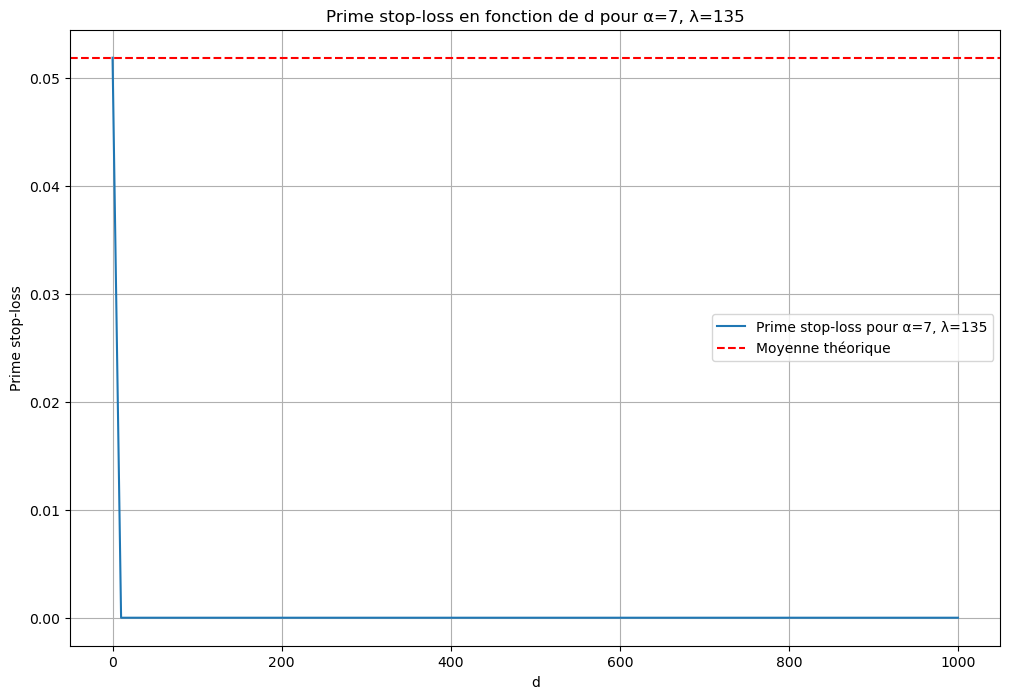

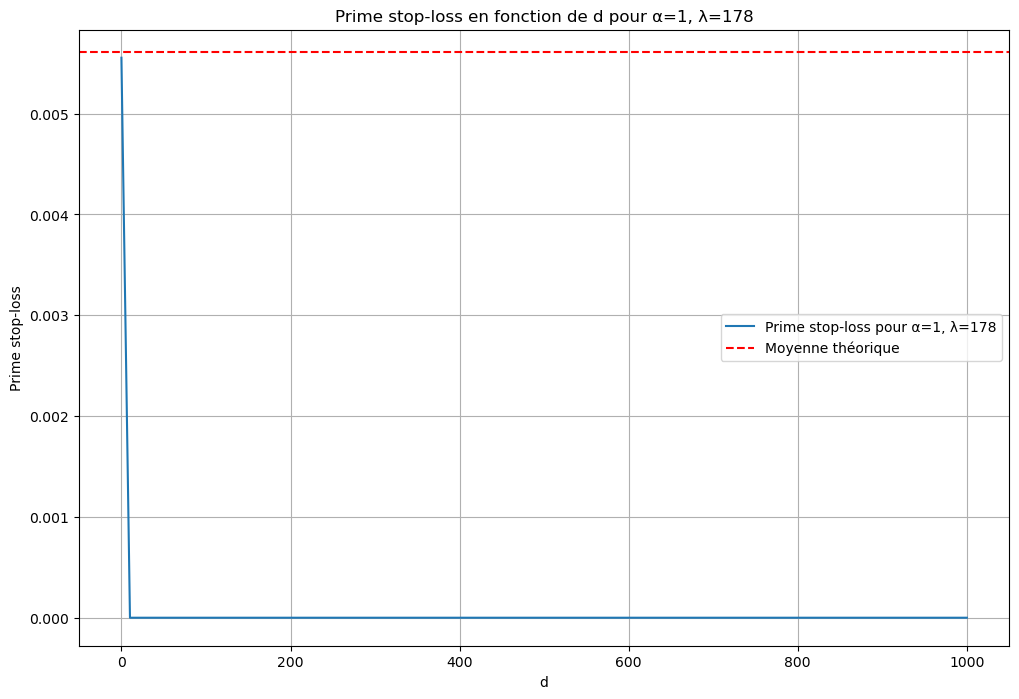

In [39]:
params = [
    (7, 135), 
    (1, 178)  ]
def stop_loss_premium(d, alpha_X, lambda_X, num_simulations=10000):
    samples = gamma.rvs(alpha_X, scale=1/lambda_X, size=num_simulations)
    t_plus_d = np.maximum(samples - d, 0)
    return np.mean(t_plus_d)

d_values = np.linspace(0, 1000, 100)

for alpha_X, lambda_X in params:
    premiums = [stop_loss_premium(d, alpha_X, lambda_X) for d in d_values]
    
    plt.figure(figsize=(12, 8))
    plt.plot(d_values, premiums, label=f'Prime stop-loss pour α={alpha_X}, λ={lambda_X}')
    plt.axhline(stop_loss_premium(0, alpha_X, lambda_X), color='r', linestyle='--', label='Moyenne théorique')
    plt.xlabel('d')
    plt.ylabel('Prime stop-loss')
    plt.title(f'Prime stop-loss en fonction de d pour α={alpha_X}, λ={lambda_X}')
    plt.legend()
    plt.grid(True)
    plt.show()


<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

**La prime stop-loss diminue rapidement lorsque la franchise d augmente, puis tend vers zéro autour de d=100. La ligne rouge représente la prime sans franchise, indiquant la moyenne théorique initiale de la prime avant l'effet de réduction par d.**



- en pratique, cette tendance est généralement confirmée : la prime stop-loss diminue fortement avec l'augmentation de la franchise d, car une plus grande partie du risque est absorbée par le preneur d'assurance, réduisant ainsi le coût pour l'assureur




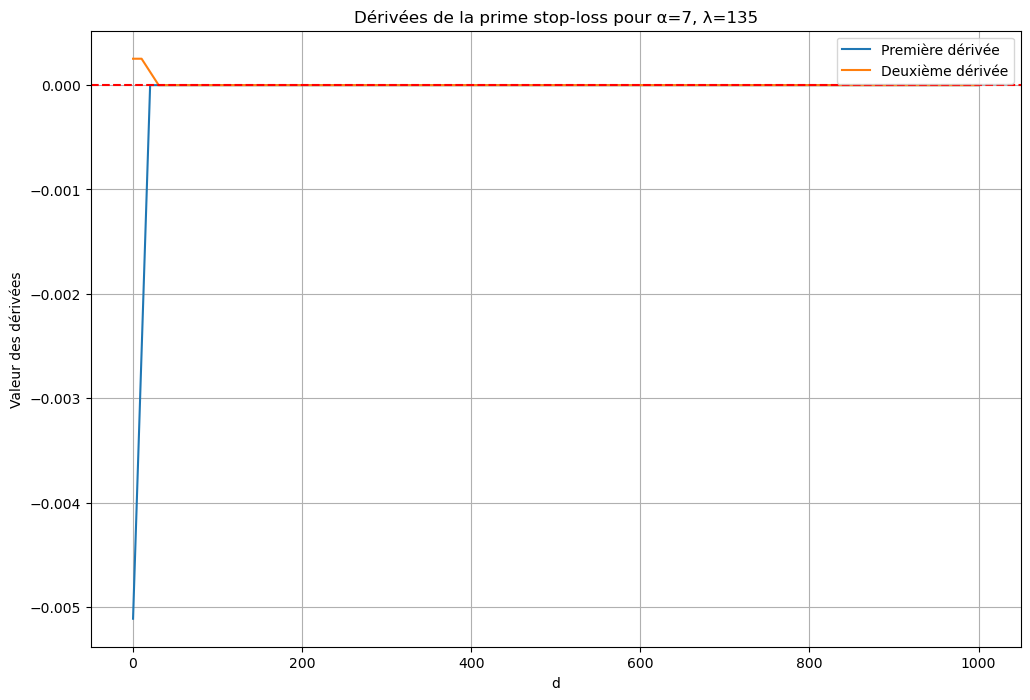

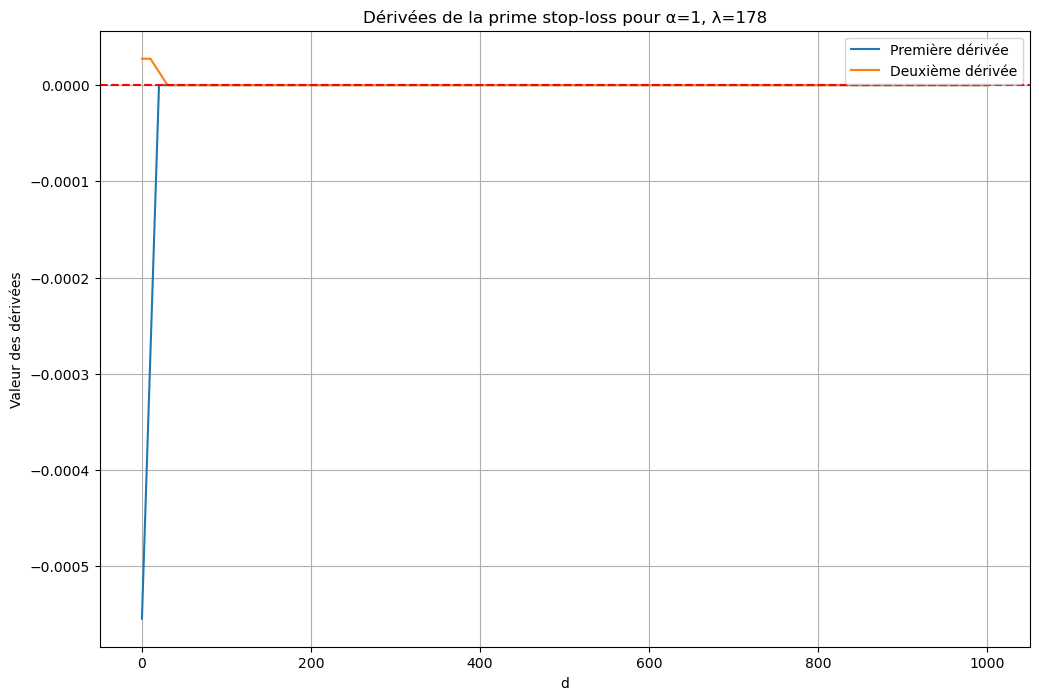

In [40]:
for alpha_X, lambda_X in params:
    premiums = [stop_loss_premium(d, alpha_X, lambda_X) for d in d_values]
    derivatives = np.gradient(premiums, d_values)
    second_derivatives = np.gradient(derivatives, d_values)

    plt.figure(figsize=(12, 8))
    plt.plot(d_values, derivatives, label='Première dérivée')
    plt.plot(d_values, second_derivatives, label='Deuxième dérivée')
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('d')
    plt.ylabel('Valeur des dérivées')
    plt.title(f'Dérivées de la prime stop-loss pour α={alpha_X}, λ={lambda_X}')
    plt.legend()
    plt.grid(True)
    plt.show()


<div style="background-color: #87CEEB; padding: 10px; border-radius: 5px;">

- Première dérivée : Dans les deux cas, la première dérivée est initialement négative et tend vers zéro, indiquant que la prime stop-loss diminue rapidement au début lorsque d augmente, puis la diminution ralentit progressivement.

- Deuxième dérivée : Elle est proche de zéro après une légère variation initiale, ce qui confirme la convexité de la prime stop-loss en fonction de 𝑑 pour ces distributions gamma. Cela signifie que l'effet de la franchise se stabilise, réduisant moins la prime au fur et à mesure que d augmente.

- Ces résultats montrent que pour les deux paramètres, la prime est convexe et décroissante, comme attendu pour une prime stop-loss.